In [2]:
import subprocess
import pydot
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats import poisson, norm, chisquare
import time

import numpy as np
import math

Код для замера времени исполнения генерации

In [29]:
def measure_execution_time(program, num_vertices, density, num_trials):
    total_time = 0
    for _ in range(num_trials):
        start_time = time.time()
        subprocess.run([program, str(num_vertices), str(density)], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        end_time = time.time()
        execution_time = end_time - start_time
        total_time += execution_time
        # print(execution_time)
    average_time = total_time / num_trials
    return average_time

# g++ -std=c++17 -O3 -march=native -I./ -I./randomizer -I./common -I/prufer_graph -I/randomizer -o a main_prufer.cpp
# перед тестированием удалить из программы запись в файл
# subprocess.run(["g++", "-std=c++17", "-O3", "-march=native", "-o", "a", "prufer_prod.cpp"], check=True)
program_name = "a.exe"
num_vertices = 10000
density = 0.1  # плотность 0.1
num_trials = 10
average_execution_time = measure_execution_time(program_name, num_vertices, density, num_trials)
print(f"Average execution time over {num_trials} trials: {average_execution_time:.6f} seconds")

Average execution time over 10 trials: 0.931511 seconds


**Демонстрация генератора**

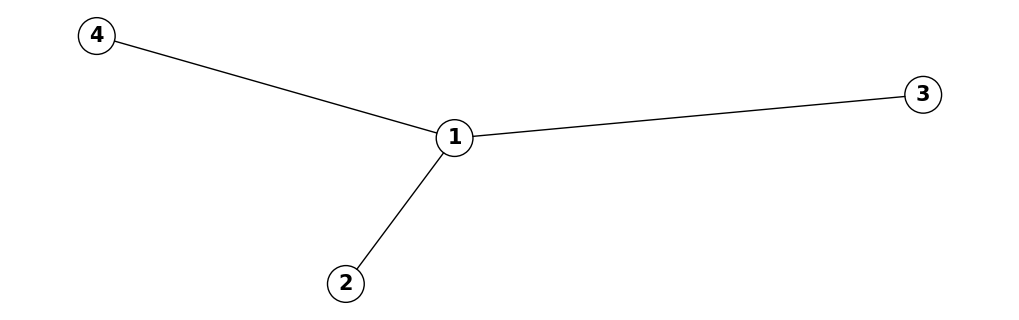

In [56]:
# Компиляция prufer.cpp с помощью g++
#subprocess.run(["g++", "-std=c++17", "-O3", "-march=native", "-o", "a", "prufer.cpp"], check=True)
# Запуск a.exe и ожидание завершения
subprocess.run(["a.exe", "4", "0"], check=True)

# Загружаем граф из файла в формате dot с помощью networkx и pydot
G = nx.nx_pydot.read_dot('graph.dot')

# Рисуем дерево
plt.figure(figsize=(10, 3))
nx.draw(G, 
        with_labels=True, 
        node_size=700,
        node_color="none",
        edgecolors="black",
        font_size=15, 
        font_weight='bold', 
        edge_color='black', 
        font_color='black') 
plt.show()

**Построение гистограммы**

In [3]:
# Функция для чтения рёбер из файла DOT
def read_dot_edges(dot_file):
    edges = []
    with open(dot_file, 'r') as f:
        for line in f:
            if '--' in line:
                parts = line.strip().strip(';').split(' -- ')
                if len(parts) == 2:
                    edges.append(tuple(map(int, parts)))
    return edges

# Функция сбора статистики
def get_sample_4deg(n, trials, density):
    all_degrees = []
    for i in range(trials):
        # Запускаем генерацию графа
        subprocess.run(["a.exe", str(n), str(density)], check=True)
        # Читаем рёбра из файла
        edges = read_dot_edges('graph.dot')
        # Подсчитываем степени вершин
        degree_count = defaultdict(int)  # Сброс перед каждым испытанием
        for u, v in edges:
            degree_count[u] += 1
            degree_count[v] += 1
        # Добавляем степени всех вершин в общий список
        all_degrees.extend(degree_count.values())
    return all_degrees

Использование генератора

In [ ]:
# Количество вершин
n = 100
# Плотность
density = 0.1
# Количество испытаний
trials = 10000
# Список для хранения степеней всех вершин во всех испытаниях
all_degrees = get_sample_4deg(n, trials, density)

# Определяем диапазон значений степеней вершин
min_degree = min(all_degrees)
max_degree = max(all_degrees)

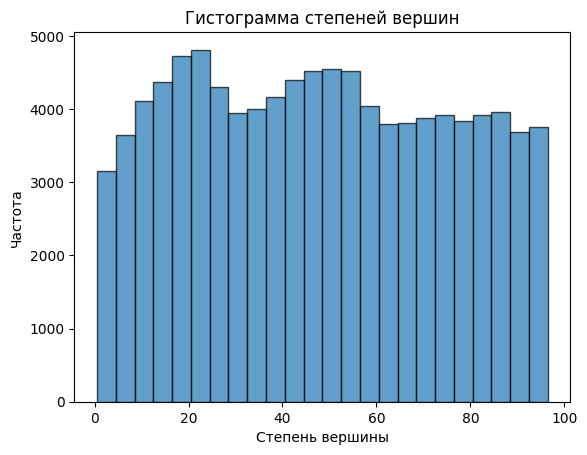

Частоты по бинам: [3158 3643 4108 4376 4723 4812 4303 3942 3995 4162 4394 4524 4544 4519
 4037 3802 3808 3880 3915 3838 3919 3961 3689 3761]
Границы бинов: [ 0.5  4.5  8.5 12.5 16.5 20.5 24.5 28.5 32.5 36.5 40.5 44.5 48.5 52.5
 56.5 60.5 64.5 68.5 72.5 76.5 80.5 84.5 88.5 92.5 96.5]


In [65]:
# Число бинов
num_bins = (n - 1)//4  # Бины от 1 до N-1, то есть, для 4 вершин, бины от 1 до 3
# Определяем границы бинов
bin_edges = np.arange(0.5, n + 0.5, n/(num_bins + 1))

# Строим гистограмму степеней вершин с использованием указанных границ бинов
plt.hist(all_degrees, bins=bin_edges, edgecolor='black', alpha=0.7)
plt.title('Гистограмма степеней вершин')
plt.xlabel('Степень вершины')
plt.ylabel('Частота')

# Показать гистограмму
plt.show()

'''
# Используем логарифмическую оценку для количества бинов
num_bins = n#math.ceil(math.log2(len(all_degrees)) + 1)

# Строим гистограмму степеней вершин
plt.hist(all_degrees, bins=num_bins, edgecolor='black', alpha=0.7)
plt.title('Гистограмма степеней вершин')
plt.xlabel('Степень вершины')
plt.ylabel('Частота')
plt.show()
'''
hist_values, bin_edges = np.histogram(all_degrees, bins=bin_edges)

# Выводим частоты для каждого бина
print("Частоты по бинам:", hist_values)
print("Границы бинов:", bin_edges)

Анализ гистограммы с ипользованием построения в c++

[ 3525  7160  9233 10148 10034 10129 10088 10106 10126 10039  9971 10019
  9838  9728  9962  9848  9917 10283 10255 10422 10533 10412 10343 10549
 10604 10386 10278 10402 10103 10222 10111 10010 10121 10068 10061 10005
  9802  9931 10018 10091 10206 10185 10079 10222 10334 10531 10254 10303
 10365 10456 10417 10557 10373 10220 10360 10278 10220 10314 10279 10290
 10286 10067 10341 10206 10405 10539 10381 10710 10305 10600 10484 10524
 10410 10358 10241 10150 10280 10343 10034  9960 10103  9953 10073 10001
  9998  9928 10173  9889 10203 10135 10084 10292 10381 10433 10333 10374
 10294  9926  9679]


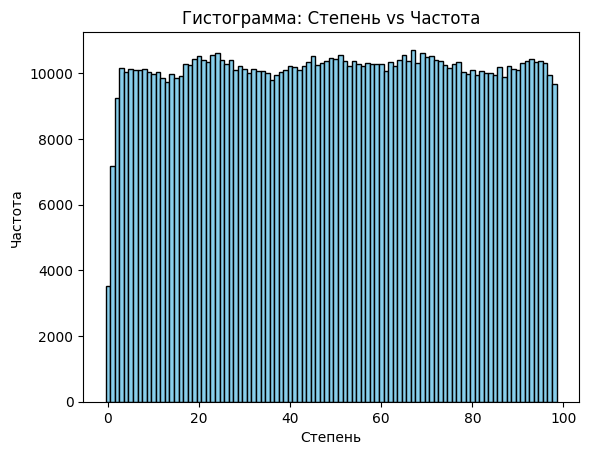

In [25]:
import numpy as np

def read_vector_from_file(filename):
    with open(filename, 'rb') as file:
        # Читаем размер вектора
        size = np.fromfile(file, dtype=np.uint64, count=1)[0]

        # Читаем данные вектора
        vec = np.fromfile(file, dtype=np.int32, count=size)

    return vec

# Чтение вектора из файла
deg = read_vector_from_file('histogram.bin')[1:] # степени 0 быть не может, т.к. граф связен по построению

# Выводим содержимое вектора
print(deg)

degrees = np.arange(len(deg))

# Построение гистограммы
plt.bar(degrees, deg, width=1.0, align='center', color='skyblue', edgecolor='black')

# Настройка подписей и заголовка
plt.xlabel('Степень')
plt.ylabel('Частота')
plt.title('Гистограмма: Степень vs Частота')

# Отображение графика
plt.show()

**Проверка гипотезы о нормальности**

<BarContainer object of 3 artists>

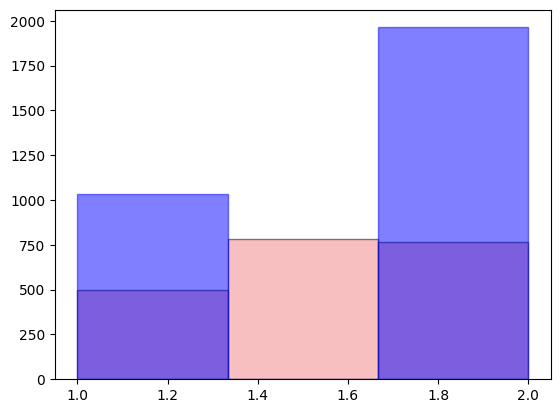

In [70]:
num_bins = n
#num_bins = n//4#math.ceil(math.log2(len(all_degrees)) + 1)

hist_values, bin_edges = np.histogram(all_degrees, bins=num_bins)

# Вывод диапазонов бинов
bin_mid = []
lg = bin_edges[1] - bin_edges[0]
for i in range(len(bin_edges) - 1):
    bin_mid.append((bin_edges[i+1] + bin_edges[i])/2)
    #print(f"Бин {i+1}: [{bin_edges[i]:.2f}, {bin_edges[i+1]:.2f}]")

mu, sigma = np.mean(all_degrees), np.std(all_degrees)

# Вычисление ожидаемых частот для нормального распределения
expected_freqs = []
for i in range(len(bin_edges) - 1):
    p = norm.cdf(bin_edges[i+1], mu, sigma) - norm.cdf(bin_edges[i], mu, sigma)
    expected_freqs.append(p * len(all_degrees))

plt.bar(bin_mid, expected_freqs, width=lg, edgecolor="black", alpha=0.5, color='lightcoral', label="Ожидаемые частоты")
plt.bar(bin_mid, hist_values, width=lg, edgecolor="blue", alpha=0.5, color='blue', label="Ожидаемые частоты")

#plt.hist(all_degrees, bins=num_bins, edgecolor='black', alpha=0.5)

In [615]:
from scipy.stats import chisquare

# Применение хи-квадрат теста
chi_stat, p_value = chisquare(expected_freqs)

# Вывод результатов
print(f"Хи-квадрат статистика: {chi_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

# Интерпретация результата
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Отклоняем гипотезу о нормальном распределении степеней вершин.")
else:
    print("Не можем отвергнуть гипотезу о нормальности.")


Хи-квадрат статистика: 2741.2041
P-значение: 0.0000
Отклоняем гипотезу о нормальном распределении степеней вершин.


**Проверка гипотезы о распределении пуассона**

<BarContainer object of 10 artists>

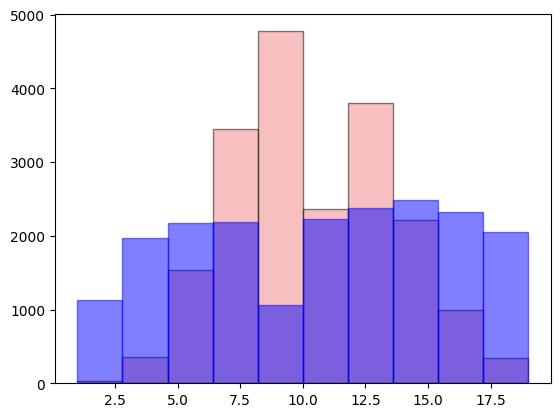

In [618]:
lambda_poisson = np.mean(all_degrees)

expected_freqs_poisson = []
for i in range(len(bin_edges) - 1):
    # Число событий в пределах интервала (bin)
    lower, upper = bin_edges[i], bin_edges[i + 1]
    expected_prob = poisson.cdf(upper, lambda_poisson) - poisson.cdf(lower, lambda_poisson)
    expected_freqs_poisson.append(expected_prob * len(all_degrees))

plt.bar(bin_mid, expected_freqs_poisson, width=lg, edgecolor="black", alpha=0.5, color='lightcoral', label="Ожидаемые частоты")
plt.bar(bin_mid, hist_values, width=lg, edgecolor="blue", alpha=0.5, color='blue', label="Ожидаемые частоты")